In [1]:
from astropy.io import fits
import numpy as np
import os.path
import matplotlib.pyplot as plt
from astropy import wcs
from astropy.nddata import Cutout2D
from astropy import coordinates
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS
import matplotlib.gridspec as gridspec
import aplpy
import pandas as pd
from photutils import SkyCircularAperture
from photutils import aperture_photometry
%matplotlib inline

In [18]:
path = '/Users/justin/Documents/Master_Thesis/data/catalogues/chandra_7ms/big_table.fits'
big_table = fits.open(path)[1].data
rk = np.power((np.power((big_table.field('CANDELS_160_RA')-big_table.field('HUGS_RA')),2) + np.power((big_table.field('CANDELS_160_Dec')-big_table.field('HUGS_Dec')),2)),0.5)*3600.
rj = np.power((np.power((big_table.field('CANDELS_160_RA')-big_table.field('CANDELS_125_RA')),2) + np.power((big_table.field('CANDELS_160_Dec')-big_table.field('CANDELS_125_Dec')),2)),0.5)*3600.
ry = np.power((np.power((big_table.field('CANDELS_160_RA')-big_table.field('CANDELS_105_RA')),2) + np.power((big_table.field('CANDELS_160_Dec')-big_table.field('CANDELS_105_Dec')),2)),0.5)*3600.
rz = np.power((np.power((big_table.field('CANDELS_160_RA')-big_table.field('GOODS_z_RA')),2) + np.power((big_table.field('CANDELS_160_Dec')-big_table.field('GOODS_z_Dec')),2)),0.5)*3600.
ri = np.power((np.power((big_table.field('CANDELS_160_RA')-big_table.field('GOODS_i_RA')),2) + np.power((big_table.field('CANDELS_160_Dec')-big_table.field('GOODS_i_Dec')),2)),0.5)*3600.
rv = np.power((np.power((big_table.field('CANDELS_160_RA')-big_table.field('GOODS_v_RA')),2) + np.power((big_table.field('CANDELS_160_Dec')-big_table.field('GOODS_v_Dec')),2)),0.5)*3600.
rb = np.power((np.power((big_table.field('CANDELS_160_RA')-big_table.field('GOODS_b_RA')),2) + np.power((big_table.field('CANDELS_160_Dec')-big_table.field('GOODS_b_Dec')),2)),0.5)*3600.

for i in range(big_table.size):
    if rk[i]==0:
        rk[i]=-99.
    if (rk[i] > 0.2) & (rk[i] < 0.5):
        print('K', i+1, rk[i])
    if rj[i]==0:
        rj[i]=-99.
    if (rj[i] > 0.2) & (rj[i] < 0.5):
        print('J', i+1, rj[i])
    if ry[i]==0:
        ry[i]=-99.
    if (ry[i] > 0.2) & (ry[i] < 0.5):
        print('Y', i+1, ry[i])
    if rz[i]==0:
        rz[i]=-99.
    if (rz[i] > 0.2) & (rz[i] < 0.5):
        print('z', i+1, rz[i])
    if ri[i]==0:
        ri[i]=-99.
    if (ri[i] > 0.2) & (ri[i] < 0.5):
        print('i', i+1, ri[i])
    if rv[i]==0:
        rv[i]=-99.
    if (rv[i] > 0.2) & (rv[i] < 0.5):
        print('V', i+1, rv[i])
    if rb[i]==0:
        rb[i]=-99.
    if (rb[i] > 0.05) & (rb[i] < 0.5):
        print('B', i+1, rb[i])

B 150 0.301923481703
B 195 0.159957119244
B 205 0.0625861837596
i 239 0.201853447877
i 245 0.201165603436
V 245 0.247921103588
z 250 0.20828947932
K 263 0.287081435115
J 263 0.227092382992
V 287 0.34273247879
J 288 0.21165826417
Y 288 0.243114106524
z 288 0.318498899199
V 288 0.308235060897
B 288 0.23606586536
K 353 0.260978399122
J 354 0.225102216784
B 356 0.166250245078
Y 391 0.225913983598
z 391 0.278733240165
i 391 0.23178744742
V 391 0.285052037325
J 393 0.232933631785
Y 393 0.357841629813
i 393 0.357765565732
V 393 0.36885597191
B 393 0.25993944527
i 397 0.234514511297
B 405 0.394615835442
B 412 0.3646359302
Y 421 0.222994647464
i 421 0.27567186576
V 421 0.201403511389
K 453 0.285680358407
B 471 0.221769934866
i 522 0.367811667056
V 522 0.371604583447
K 546 0.247336768008
Y 547 0.350871668853
i 578 0.220139337694
V 578 0.238043858159
B 578 0.120115444469
Y 633 0.388691318125
z 633 0.387996837116
K 657 0.270156434697
z 739 0.238436889779
i 739 0.215737340318
V 739 0.360932093342
B

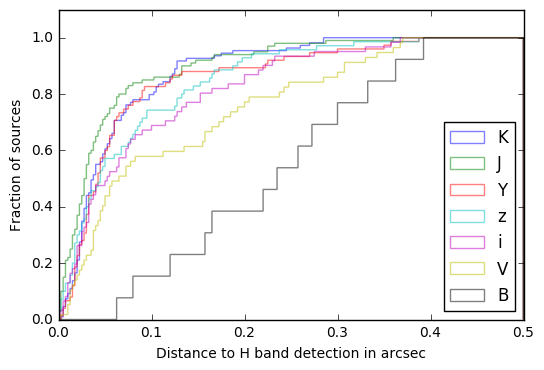

In [15]:
f = plt.figure()
ax = f.add_subplot(111)
ax = plt.hist(rk, 200, range=(0.,0.5), normed=True, cumulative=True, alpha=0.5, histtype='step', label='K')
ax = plt.hist(rj, 200, range=(0.,0.5), normed=True, cumulative=True, alpha=0.5, histtype='step', label='J')
ax = plt.hist(ry, 200, range=(0.,0.5), normed=True, cumulative=True, alpha=0.5, histtype='step',label='Y')
ax = plt.hist(rz, 200, range=(0.,0.5), normed=True, cumulative=True, alpha=0.5, histtype='step',label='z')
ax = plt.hist(ri, 200, range=(0.,0.5), normed=True, cumulative=True, alpha=0.5, histtype='step',label='i')
ax = plt.hist(rv, 200, range=(0.,0.5), normed=True, cumulative=True, alpha=0.5, histtype='step',label='V')
ax = plt.hist(rb, 200, range=(0.,0.5), normed=True, cumulative=True, alpha=0.5, histtype='step',label='B')
plt.axis([0,0.5,0,1.1])
plt.xlabel('Distance to H band detection in arcsec')
plt.ylabel('Fraction of sources')
plt.legend(loc='lower right')
path = '/Users/justin/Documents/Master_Thesis/presentation/plots/search_radius_test.pdf'
plt.savefig(path, format='pdf', dpi=1000,bbox_inches='tight')